### Описание проекта

Впереди открытие оригинального кафе в Москве, в котором гостей должны обслуживать роботы-официанты. В связи с этим команда инновационных рестораторов обратилась к гению аналитики (т.е. ко мне) с целью исследования рынка и подготовки презентации для инвеасторов. Из всего выданного мне снаряжения есть только данные о заведениях общественного питания в Москве, но этого вполне достаточно.

# Часть 1: Описание данных

Таблица rest_data:
- id — идентификатор объекта;
- object_name — название объекта общественного питания;
- chain — сетевой ресторан;
- object_type — тип объекта общественного питания;
- address — адрес;
- number — количество посадочных мест.

# Задача

 - Шаг №1. Загрузите данные и подготовьте их к анализу
 - Шаг №2. Анализ данных. Необходимо исследовать рынок общественного питания в Москве
 - Шаг №3. Подготовить презентацию для демонстрации результатов клиентам

### Начало работ

#### Загрузка данных

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import math as mth
import matplotlib.pyplot as plt
import requests
from io import BytesIO

In [2]:
data = pd.read_csv('/datasets/rest_data.csv')
data

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


Видно, что с типами данных особо проблемы нет. Единственное нужно столбец 'chain' поменять на bool значения. Пропусков не наблюдается. 

#### Предобработка

In [4]:
# Приводим весь текст к нижнему регистру
data['object_name'] = data['object_name'].str.lower()
data['address'] = data['address'].str.lower()

In [5]:
# Проверка на дубликаты
data.duplicated().sum()

0

In [6]:
data.duplicated(subset=['object_name','chain','object_type','address','number']).sum()

85

In [7]:
data = data.drop_duplicates(subset=['object_name','chain','object_type','address','number']).reset_index()

In [8]:
# меняем названия типов объектов на более компактный
data['object_type'] = data['object_type'].str.replace('предприятие быстрого обслуживания', 'фаст-фуд')


In [9]:
data['object_type'] = data['object_type'].str.replace('магазин (отдел кулинарии)', 'кулинария', regex=False)

In [10]:
# меяем да и нет на True и False для дальнейших расчетов
data['chain'] = data['chain'].map({'да': True, 'нет':False})

#### Исследование соотношения видов объектов общественного питания по количеству

In [11]:
# создаем табличку с видами объектов и их количество
ratio_types_catering_by_number = data.groupby('object_type', as_index=False)\
.agg({'number':'count'})\
.sort_values(by='number')\
.reset_index(inplace = False, drop = True)

print(ratio_types_catering_by_number)

  object_type  number
0   кулинария     273
1  закусочная     348
2   кафетерий     395
3       буфет     576
4         бар     855
5    фаст-фуд    1897
6    ресторан    2282
7    столовая    2584
8        кафе    6071


<Figure size 432x288 with 0 Axes>

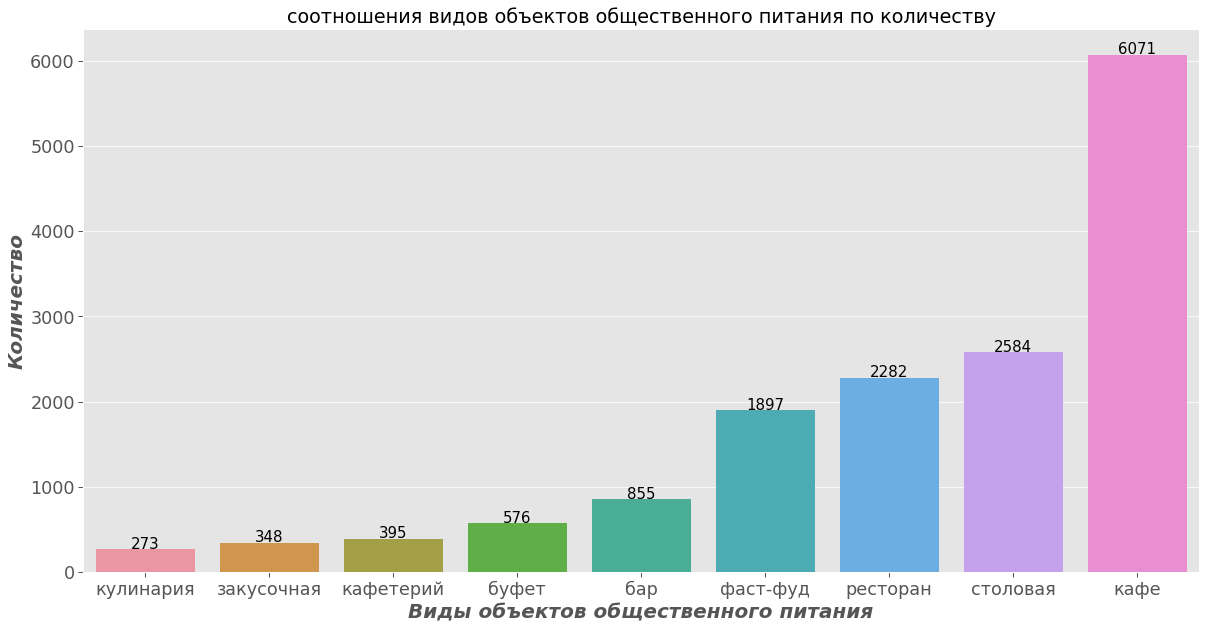

In [12]:
plt.style.use('ggplot')
sns.despine(left=True, bottom=True) 
sns.set_context("paper", font_scale=2)
ax = plt.subplots(figsize=(20, 10))

chart = sns.barplot(                                             
           x="object_type",
           y="number",
           data=ratio_types_catering_by_number
) 


chart.set_title('соотношения видов объектов общественного питания по количеству')
chart.set_ylabel('Количество', size=20, fontstyle='italic', weight=900, )
chart.set_xlabel('Виды объектов общественного питания', size=20, fontstyle='italic', weight=900, ha='center')

for p in chart.patches:
             chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=15, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

Text(0, 0.5, 'Виды объектов общественного питания')

<Figure size 432x288 with 0 Axes>

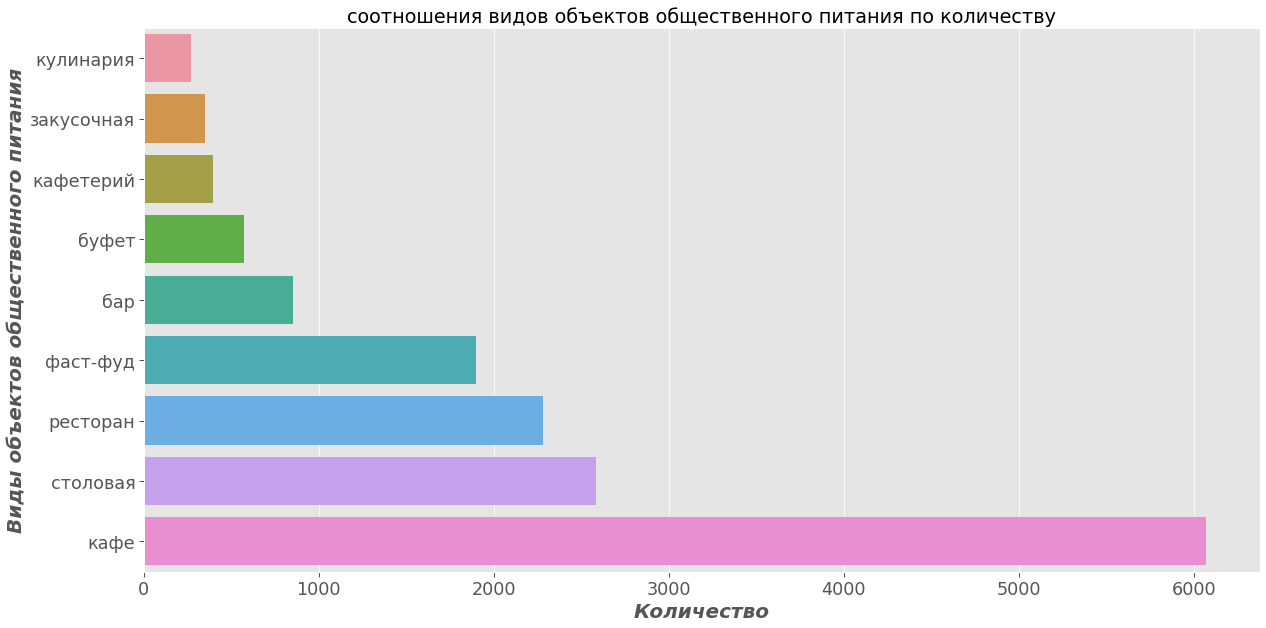

In [13]:
plt.style.use('ggplot')
sns.despine(left=True, bottom=True) 
sns.set_context("paper", font_scale=2)
ax = plt.subplots(figsize=(20, 10))

chart = sns.barplot(                                             
           x="number",
           y="object_type",
           data=ratio_types_catering_by_number
) 


chart.set_title('соотношения видов объектов общественного питания по количеству')
chart.set_xlabel('Количество', size=20, fontstyle='italic', weight=900, )
chart.set_ylabel('Виды объектов общественного питания', size=20, fontstyle='italic', weight=900, ha='center')


В топах кафе (очень сильный отрыв от остальных типов заведений), столовая, ресторан, фаст-фуд. Количество топ-4 типов заведений значително выше остальных типов.

#### Исследование соотношения сетевых и несетевых заведений по количеству. Постройте график.

In [14]:
# создаем табличку с соотношением сетевых и не сетевых заведений по количеству
ratio_establishments_by_number = data['chain'].value_counts().to_frame().reset_index()
ratio_establishments_by_number.columns = ['chain', 'count']
ratio_establishments_by_number

,chain,count
0,False,12317
1,True,2964


<Figure size 432x288 with 0 Axes>

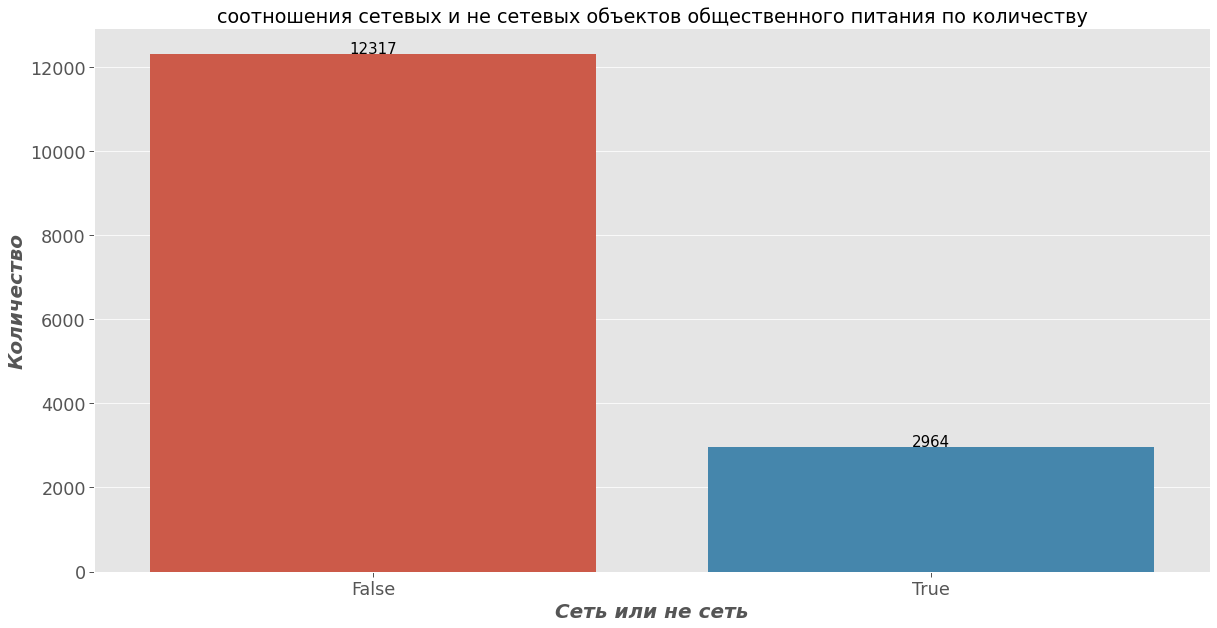

In [15]:
plt.style.use('ggplot')
sns.despine(left=True, bottom=True) 
sns.set_context("paper", font_scale=2)
ax = plt.subplots(figsize=(20, 10))

chart = sns.barplot(                                             
           x="chain",
           y="count",
           data=ratio_establishments_by_number
) 

chart.set_ylabel('Количество', size=20, fontstyle='italic', weight=900, )
chart.set_xlabel('Сеть или не сеть', size=20, fontstyle='italic', weight=900, ha='center')

chart.set_title('соотношения сетевых и не сетевых объектов общественного питания по количеству')
for p in chart.patches:
             chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=15, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

In [16]:
print('Сетевых заведений {}, соотношение к общему количеству заведений {:.2%}'
      .format(ratio_establishments_by_number.query('chain == True')['count'][1],
              ratio_establishments_by_number.query('chain == True')['count'][1] /
              data['chain'].count()))

print('Не сетевых заведений {}, соотношение к общему количеству заведений {:.2%}'
      .format(ratio_establishments_by_number.query('chain == False')['count'][0],
              ratio_establishments_by_number.query('chain == False')['count'][0] /
              data['chain'].count()))

print('Не сетевых заведений в {:.2f} раз больше, чем сетевых'
      .format(ratio_establishments_by_number.query('chain == False')['count'][0] /
              ratio_establishments_by_number.query('chain == True')['count'][1]))

Сетевых заведений 2964, соотношение к общему количеству заведений 19.40%
Не сетевых заведений 12317, соотношение к общему количеству заведений 80.60%
Не сетевых заведений в 4.16 раз больше, чем сетевых


Видим, что не сетевых в 4.18 раз больше, чем сетевых

#### Для какого вида объекта общественного питания характерно сетевое распространение?

In [17]:
# создаем сводную табличку для подсчетов
object_type_chain_non_chain = pd.pivot_table(data,
                                             index='object_type',
                                             columns='chain',
                                             values='id',
                                             aggfunc='count'
                                            ).reset_index()

# создаем колонку с общим количеством заведений каждого типа
object_type_chain_non_chain['total'] = object_type_chain_non_chain[False] + object_type_chain_non_chain[True]

# получаем долю не сетевых заведений от общего количества
object_type_chain_non_chain['percent_non_chain'] = object_type_chain_non_chain[False] / object_type_chain_non_chain['total'] * 100

# получаем долю сетевых заведений от общего количества
object_type_chain_non_chain['percent_chain'] = object_type_chain_non_chain[True] / object_type_chain_non_chain['total'] * 100

# переименовываем столбцы
object_type_chain_non_chain.columns = ['object_type', 'non_chain', 'chain', 'total', 'percent_non_chain', 'percent_chain']

# сортируем df по столбцу chain
object_type_chain_non_chain = object_type_chain_non_chain.sort_values(by='chain')

# пересчитываем index (необходимо для корректных подписей на графике)
object_type_chain_non_chain = object_type_chain_non_chain.reset_index(inplace = False, drop = True)

display(object_type_chain_non_chain)

,object_type,non_chain,chain,total,percent_non_chain,percent_chain
0,столовая,2581,3,2584,99.883901,0.116099
1,буфет,565,11,576,98.090278,1.909722
2,бар,818,37,855,95.672515,4.327485
3,кафетерий,343,52,395,86.835443,13.164557
4,закусочная,292,56,348,83.908046,16.091954
5,кулинария,195,78,273,71.428571,28.571429
6,ресторан,1739,543,2282,76.205083,23.794917
7,фаст-фуд,1109,788,1897,58.460727,41.539273
8,кафе,4675,1396,6071,77.005436,22.994564


<Figure size 432x288 with 0 Axes>

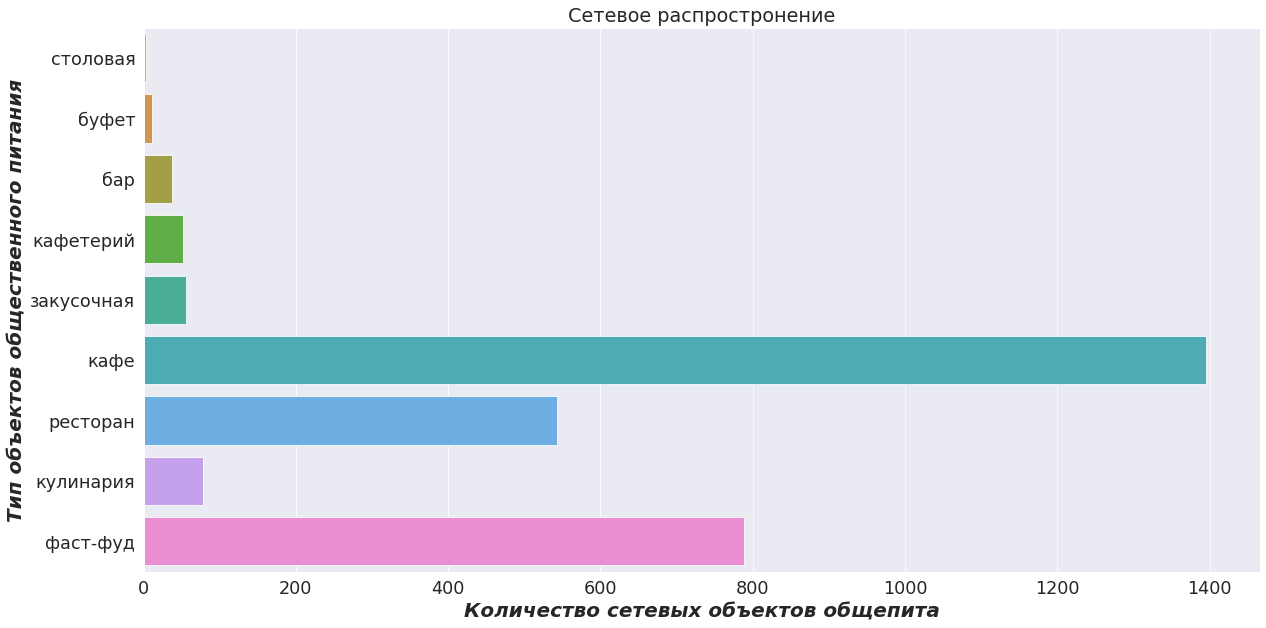

In [45]:
sns.despine(left=True, bottom=True) 
sns.set_context("paper", font_scale=2)
ax = plt.subplots(figsize=(20, 10))

chart = sns.barplot(                                             
           x="chain",
           y="object_type",
           data=object_type_chain_non_chain
) 

chart.set_title('Сетевое распростронение')
chart.set_ylabel('Тип объектов общественного питания', size=20, fontstyle='italic', weight=900, )
chart.set_xlabel('Количество сетевых объектов общепита', size=20, fontstyle='italic', weight=900, ha='center')

plt.show()

<Figure size 432x288 with 0 Axes>

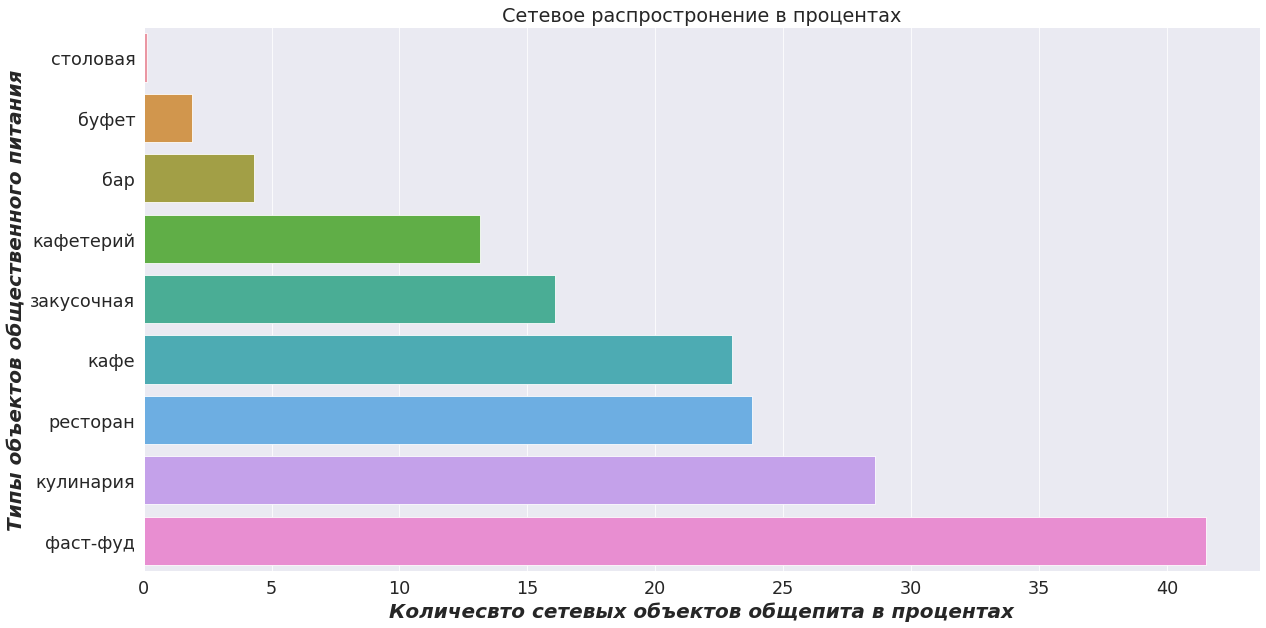

In [46]:
# сортируем df по столбцу percent_chain
object_type_chain_non_chain = object_type_chain_non_chain.sort_values(by='percent_chain')

# пересчитываем index (необходимо для корректных подписей на графике)
object_type_chain_non_chain = object_type_chain_non_chain.reset_index(inplace = False, drop = True)

sns.set_style("darkgrid")
sns.despine(left=True, bottom=True) 
sns.set_context("paper", font_scale=2)
ax = plt.subplots(figsize=(20, 10))

chart = sns.barplot(                                             
           x="percent_chain",
           y="object_type",
           data=object_type_chain_non_chain
) 

chart.set_title('Сетевое распростронение в процентах')
chart.set_ylabel('Типы объектов общественного питания', size=20, fontstyle='italic', weight=900, )
chart.set_xlabel('Количесвто сетевых объектов общепита в процентах', size=20, fontstyle='italic', weight=900, ha='center')


plt.show()

Из графика Сетевого распростронения мы наблюдаем тройку лидеров среди Сетевых заведений: кафе, фаст-фуд, ресторан, но из графика Сетевого распростронения в процентах мы наблюдаем, что свойственно быть сетевым заведением в первую очередь фаст-фуду и далее: магазин (отдел кулинария), ресторан / кафе.

#### Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

In [20]:
# убираем 0 значения и формируем датафрейм с количеством посадочных мест на заведение
rest_average_seats = data[data['number'] > 0]\
.groupby(['object_name', 'chain']).agg({'id':'count', 'number':'mean'}).reset_index()

rest_average_seats['number'] = rest_average_seats['number'].round(0).astype('int')

rest_average_seats

,object_name,chain,id,number
0,1-й мок,False,1,100
1,1-ый московский кадетский корпус,False,1,260
2,100 личная столовая,False,1,30
3,100 личное кафе,False,1,45
4,1001 ночь,False,1,70
...,...,...,...,...
9307,ясамарканд24,False,1,120
9308,ясмин,False,2,32
9309,ясон,False,2,85
9310,яуза,False,1,100


<Figure size 432x288 with 0 Axes>

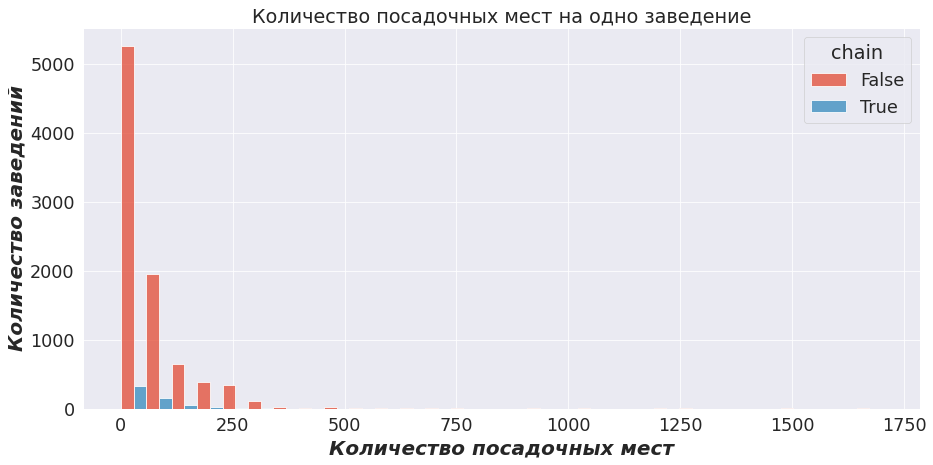

In [48]:
sns.set_style("darkgrid")
sns.despine(left=True, bottom=True) 
sns.set_context("paper", font_scale=2)
ax = plt.subplots(figsize=(15, 7))

chart = sns.histplot(                                             
           x="number",
           bins=30,
           hue='chain',
           multiple="dodge",
           data=rest_average_seats
) 
chart.set_title('Количество посадочных мест на одно заведение')
chart.set_ylabel('Количество заведений', size=20, fontstyle='italic', weight=900, )
chart.set_xlabel('Количество посадочных мест', size=20, fontstyle='italic', weight=900, ha='center')

plt.show()

<Figure size 432x288 with 0 Axes>

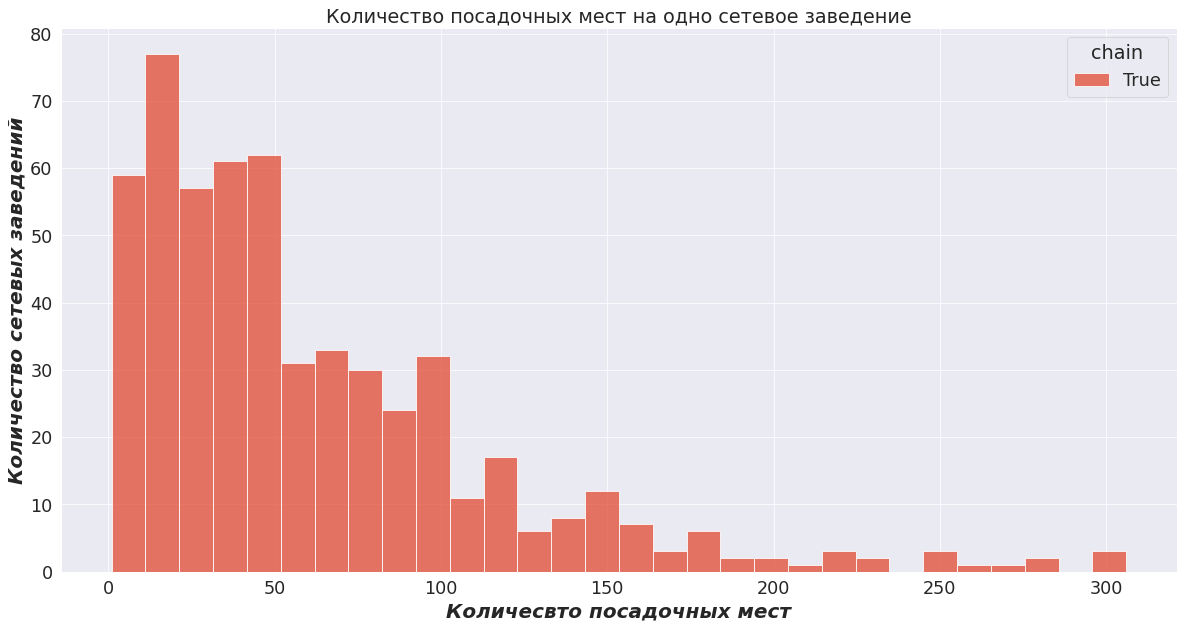

In [22]:
rest_average_seats_chain = rest_average_seats[rest_average_seats['chain'] == True]

sns.set_style("darkgrid")
sns.despine(left=True, bottom=True) 
sns.set_context("paper", font_scale=2)
ax = plt.subplots(figsize=(20, 10))

chart = sns.histplot(                                             
           x="number",
           bins=30,
           hue='chain',
           multiple="dodge",
           data=rest_average_seats_chain
) 
chart.set_title('Количество посадочных мест на одно сетевое заведение')
chart.set_ylabel('Количество сетевых заведений', size=20, fontstyle='italic', weight=900, )
chart.set_xlabel('Количесвто посадочных мест', size=20, fontstyle='italic', weight=900, ha='center')

plt.show()

Для сетевых заведений характерно иметь до 50 посадочных мест, как и для не сетевых

In [23]:
rest_average_seats_chain.describe()

,id,number
count,556.000000,556.000000
mean,4.854317,61.778777
std,14.559552,54.061156
min,1.000000,1.000000
25%,1.000000,22.000000
50%,1.000000,45.000000
75%,3.000000,85.000000
max,157.000000,306.000000


In [24]:
rest_average_seats_chain

,object_name,chain,id,number
107,beverly hills diner,True,1,88
108,bierloga,True,1,75
117,black & white,True,1,40
135,bocconcino,True,3,67
142,boobo,True,1,46
...,...,...,...,...
9295,ямми микс,True,1,2
9297,ян примус,True,1,300
9301,японский ресторан «ваби-саби»,True,1,155
9303,япоша,True,2,105


<Figure size 432x288 with 0 Axes>

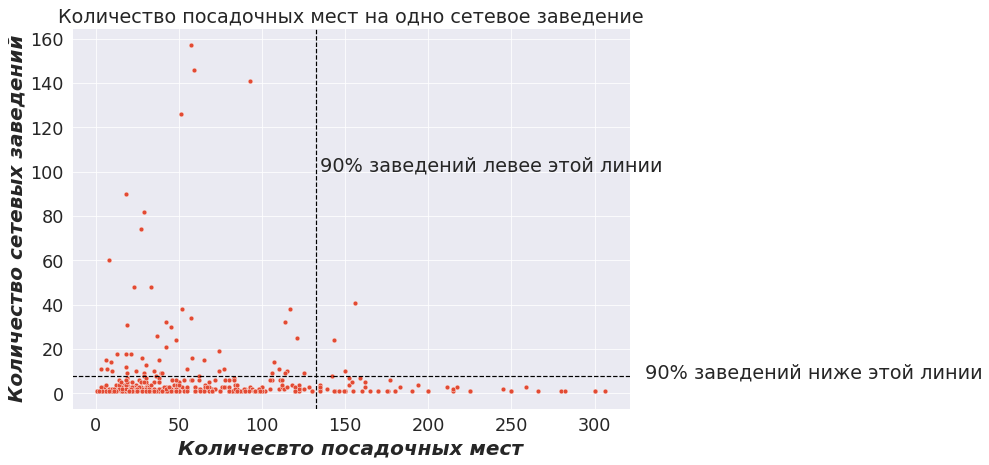

In [25]:
sns.set_style("darkgrid")
sns.despine(left=True, bottom=True) 
sns.set_context("paper", font_scale=2)
ax = plt.subplots(figsize=(10, 7))

plt.axhline(np.percentile(rest_average_seats_chain['id'], 90), linestyle='--', color='black')
plt.axvline(np.percentile(rest_average_seats_chain['number'], 90), linestyle='--', color='black')

chart = sns.scatterplot(                                             
           x="number",
           y='id',
           data=rest_average_seats_chain
) 
plt.text(330,7, '90% заведений ниже этой линии')
plt.text(135,100, '90% заведений левее этой линии')
chart.set_title('Количество посадочных мест на одно сетевое заведение')
chart.set_ylabel('Количество сетевых заведений', size=20, fontstyle='italic', weight=900, )
chart.set_xlabel('Количесвто посадочных мест', size=20, fontstyle='italic', weight=900, ha='center')

plt.show()

<div class="alert alert-info"> <b>Как мы видим из графика, как правило, в сетевых заведениях - мало заведений с большим количеством посадочных мест. </div>

#### Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.

<Figure size 432x288 with 0 Axes>

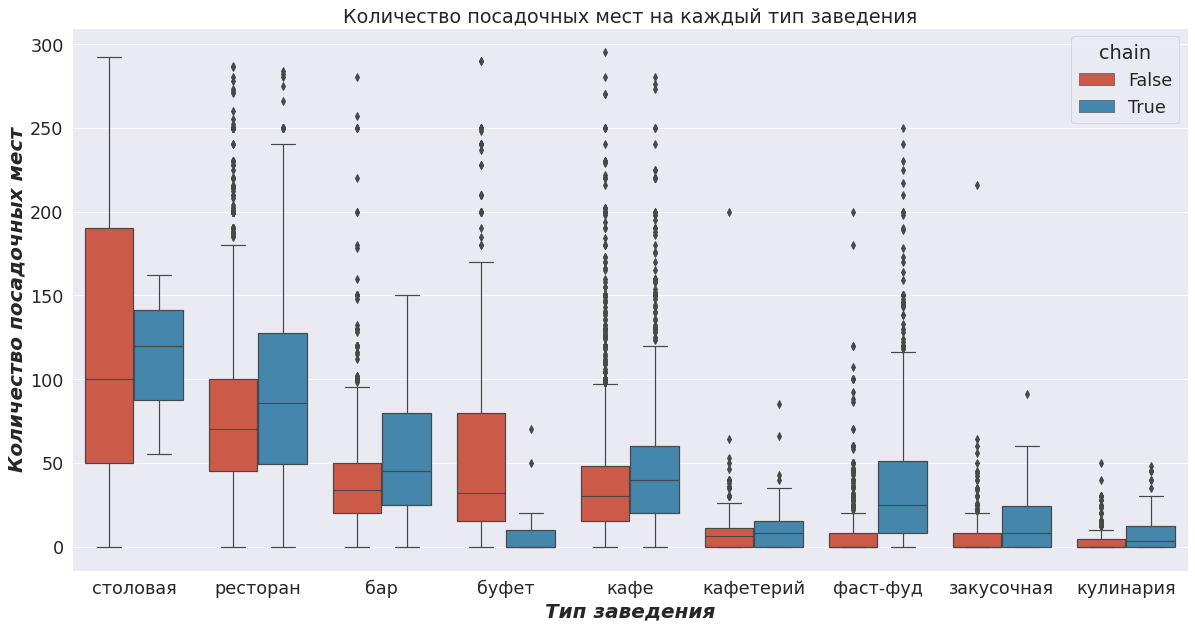

In [26]:
sns.set_style("darkgrid")
sns.despine(left=True, bottom=True) 
sns.set_context("paper", font_scale=2)
ax = plt.subplots(figsize=(20, 10))

chart = sns.boxplot(                                             
           x="object_type",
           y="number",
           hue='chain',
           data=data[data['number']<300],
           order = data.groupby(by=["object_type"])["number"].median().sort_values(ascending = False).index
) 
chart.set_title('Количество посадочных мест на каждый тип заведения')
chart.set_ylabel('Количество посадочных мест', size=20, fontstyle='italic', weight=900, )
chart.set_xlabel('Тип заведения', size=20, fontstyle='italic', weight=900, ha='center')


plt.show()

In [27]:
# строим табличку со средним количеством мест на каждый объект
types_objects_by_number = data.groupby('object_type', as_index=False)\
.agg({'number':'median'})\
.sort_values(by='number')\
.reset_index(inplace = False, drop = True)

# округляем и приволим к типу int
types_objects_by_number['number'] = types_objects_by_number['number'].round(0).astype('int')

types_objects_by_number

,object_type,number
0,закусочная,0
1,кулинария,0
2,кафетерий,6
3,фаст-фуд,6
4,кафе,30
5,буфет,32
6,бар,35
7,ресторан,80
8,столовая,103


<Figure size 432x288 with 0 Axes>

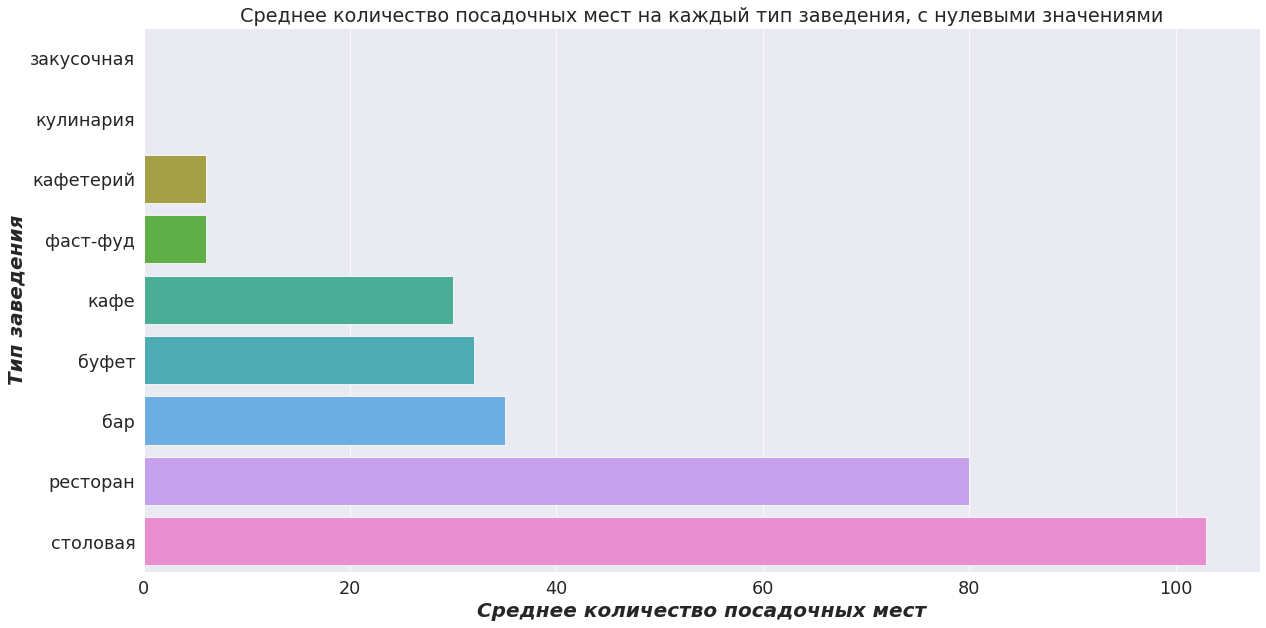

In [49]:
sns.set_style("darkgrid")
sns.despine(left=True, bottom=True) 
sns.set_context("paper", font_scale=2)
ax = plt.subplots(figsize=(20, 10))

chart = sns.barplot(                                             
           x="number",
           y="object_type",
           data=types_objects_by_number
) 

chart.set_ylabel('Тип заведения', size=20, fontstyle='italic', weight=900, )
chart.set_xlabel('Среднее количество посадочных мест', size=20, fontstyle='italic', weight=900, ha='center')
chart.set_title('Среднее количество посадочных мест на каждый тип заведения, с нулевыми значениями')

plt.show()

In [29]:
# убираем нулевые значения
rest_without_zero = data[data['number'] != 0]

# формируем df с средним количеством мест на каждый объект
types_objects_by_number_without_zero = rest_without_zero.groupby('object_type', as_index=False)\
.agg({'number':'median'})\
.sort_values(by='number')\
.reset_index(inplace = False, drop = True)
types_objects_by_number_without_zero

,object_type,number
0,кулинария,8.5
1,кафетерий,9.0
2,закусочная,10.0
3,фаст-фуд,20.0
4,бар,35.0
5,кафе,35.0
6,буфет,40.0
7,ресторан,80.0
8,столовая,105.0


In [30]:
# округляем и приволим к типу int
types_objects_by_number_without_zero['number'] = types_objects_by_number_without_zero['number'].round(0).astype('int')

<Figure size 432x288 with 0 Axes>

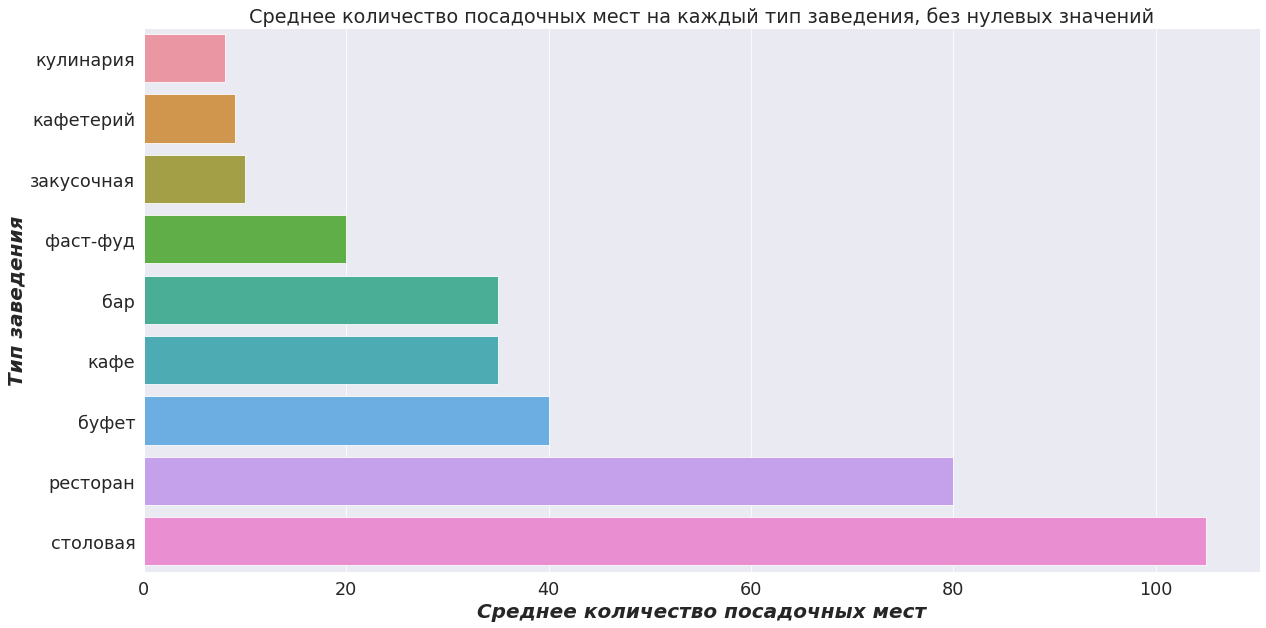

In [50]:
sns.set_style("darkgrid")
sns.despine(left=True, bottom=True) 
sns.set_context("paper", font_scale=2)
ax = plt.subplots(figsize=(20, 10))

chart = sns.barplot(                                             
           x="number",
           y="object_type",
           data=types_objects_by_number_without_zero
) 

chart.set_ylabel('Тип заведения', size=20, fontstyle='italic', weight=900, )
chart.set_xlabel('Среднее количество посадочных мест', size=20, fontstyle='italic', weight=900, ha='center')
chart.set_title('Среднее количество посадочных мест на каждый тип заведения, без нулевых значений')

plt.show()

- В топ-3 вида общественного питания вошли: столовая, ресторан, буфет
- Наблюдается незначительная разница в графиках видов заведений с нулевым количеством сидячих мест и заведений без нулевых сидячих мест в топ-3. Сильная разница наблюдается в видах, где не предусмотрены сидячие места, либо их количество крайне мало.

#### Выделите в отдельный столбец информацию об улице из столбца address

In [32]:
# выделяем в отдельный столбец информацию об улице из столбца address
def add_street(data):
    name_street = ['улица',
                   'бульвар',
                   'шоссе',
                   'переулок',
                   'проезд',
                   'проспект',
                   'набережная',
                   'линия',
                   'тупик',
                   'километр',
                   'аллея',
                   'площадь'
                  ]

    for street in data:
        for name in name_street:
            if name in street:
                return street

data['street'] = data['address'].str.split(', ').apply(add_street)

In [33]:
data['street'].isna().sum()

359

In [34]:
# заполняем пропуски в столбце street
def add_region(data):
    name_region = ['посёлок',
                   'село',
                   'зеленоград',
                   'деревня',
                   'территория',
                   'просек',
                   'вблизи',
                   'квартал',
                   'микрорайон',
                   'капотня',
                   'площадь'
                  ]

    for street in data:
        for name in name_region:
            if name in street:
                return street


data.loc[data['street'].isna(), 'street'] = data['address'].str.split(', ').apply(add_region)

In [35]:
data.head()

,index,id,object_name,chain,object_type,address,number,street
0,0,151635,сметана,False,кафе,"город москва, улица егора абакумова, дом 9",48,улица егора абакумова
1,1,77874,родник,False,кафе,"город москва, улица талалихина, дом 2/1, корпус 1",35,улица талалихина
2,2,24309,кафе «академия»,False,кафе,"город москва, абельмановская улица, дом 6",95,абельмановская улица
3,3,21894,пиццетория,True,кафе,"город москва, абрамцевская улица, дом 1",40,абрамцевская улица
4,4,119365,кафе «вишневая метель»,False,кафе,"город москва, абрамцевская улица, дом 9, корпус 1",50,абрамцевская улица


In [36]:
data['street'].isna().sum()

0

#### Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [37]:
# обращаемся к внешнему источнику 
spreadsheet_id = '1fGtfX_6otenOiCBRzt61bQe9l3gB7B8BEp-qPcWkRKA'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
mascow_streets = pd.read_csv(BytesIO(r.content))
mascow_streets['streetname'] = mascow_streets['streetname'].str.lower()
mascow_streets.head()

,streetname,areaid,okrug,area
0,выставочный переулок,17,ЦАО,Пресненский район
1,улица гашека,17,ЦАО,Пресненский район
2,большая никитская улица,17,ЦАО,Пресненский район
3,глубокий переулок,17,ЦАО,Пресненский район
4,большой гнездниковский переулок,17,ЦАО,Пресненский район


In [38]:
# формируем топ с улицами по количеству заведений
street_count = data.groupby('street').agg({'id':'count'}).sort_values(by='id', ascending=False)
top_10 = street_count.head(10).reset_index()
print(top_10)

# формируем топ с округами
top_okrug = list(mascow_streets[mascow_streets['streetname'].isin(top_10.reset_index()['street'])]['okrug'].unique())
top_okrug

                   street   id
0           проспект мира  203
1       профсоюзная улица  182
2  ленинградский проспект  172
3  пресненская набережная  167
4        варшавское шоссе  165
5      ленинский проспект  148
6        город зеленоград  129
7    проспект вернадского  128
8    кутузовский проспект  114
9         каширское шоссе  111


['ЦАО', 'ЗАО', 'Зеленоград', 'САО', 'СВАО', 'ЮАО', 'ЮЗАО']

<Figure size 432x288 with 0 Axes>

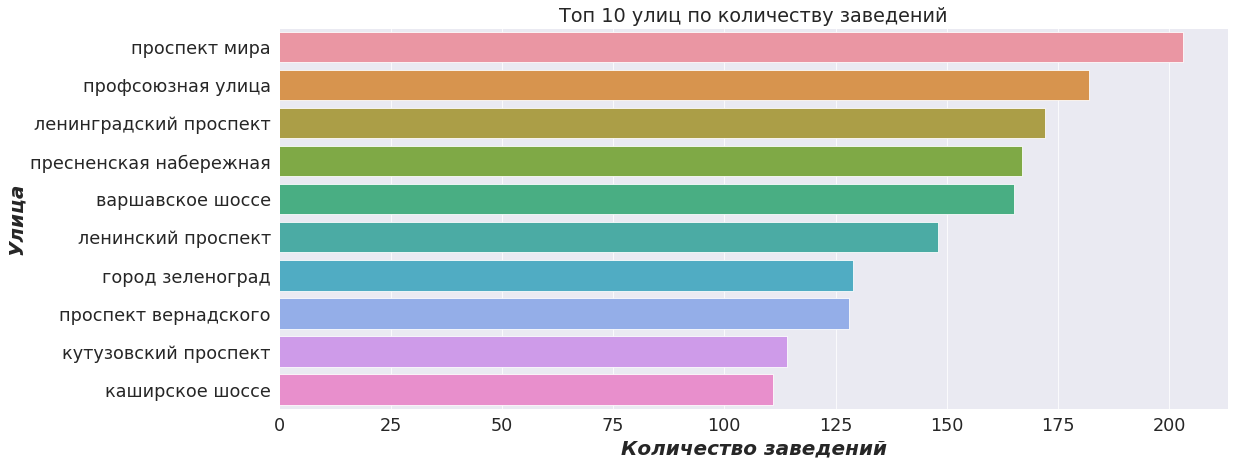

In [52]:
# строим график
sns.set_style("darkgrid")
sns.despine(left=True, bottom=True) 
sns.set_context("paper", font_scale=2)
ax = plt.subplots(figsize=(17, 7))

chart = sns.barplot(                                             
           x="id",
           y="street",
           data=top_10
) 


chart.set_ylabel('Улица', size=20, fontstyle='italic', weight=900, )
chart.set_xlabel('Количество заведений', size=20, fontstyle='italic', weight=900, ha='center')
chart.set_title('Топ 10 улиц по количеству заведений')


plt.show()

In [40]:
# отвечаем на поставленный вопрос
streets_area_top_10 = top_10.merge(mascow_streets, how='left', left_on='street', right_on='streetname')
streets_area_top_10_group = pd.pivot_table(streets_area_top_10,
                                             index=['street', 'area']
                                            )
del streets_area_top_10_group['areaid']
del streets_area_top_10_group['id']

streets_area_top_10_group

Empty DataFrame
Columns: []
Index: [(варшавское шоссе, Донской район), (варшавское шоссе, Нагорный район), (варшавское шоссе, Район Нагатино-Садовники), (варшавское шоссе, Район Северное Бутово), (варшавское шоссе, Район Чертаново Северное), (варшавское шоссе, Район Чертаново Центральное), (варшавское шоссе, Район Чертаново Южное), (варшавское шоссе, Район Южное Бутово), (город зеленоград, Панфиловский район), (город зеленоград, Район Крюково), (город зеленоград, Район Матушкино-Савелки), (каширское шоссе, Район Москворечье-Сабурово), (каширское шоссе, Район Нагатино-Садовники), (каширское шоссе, Район Орехово-Борисово Северное), (каширское шоссе, Район Орехово-Борисово Южное), (кутузовский проспект, Район Дорогомилово), (кутузовский проспект, Район Фили-Давыдково), (ленинградский проспект, Район Аэропорт), (ленинградский проспект, Район Беговой), (ленинградский проспект, Район Сокол), (ленинградский проспект, Хорошевский район), (ленинский проспект, Донской район), (ленинский проспект, Ломоносовский район), (ленинский проспект, Обручевский район), (ленинский проспект, Район Гагаринский), (ленинский проспект, Район Проспект Вернадского), (ленинский проспект, Район Теплый Стан), (ленинский проспект, Район Тропарево-Никулино), (ленинский проспект, Район Якиманка), (пресненская набережная, Пресненский район), (проспект вернадского, Ломоносовский район), (проспект вернадского, Район Гагаринский), (проспект вернадского, Район Проспект Вернадского), (проспект вернадского, Район Раменки), (проспект вернадского, Район Тропарево-Никулино), (проспект мира, Алексеевский район), (проспект мира, Мещанский район), (проспект мира, Останкинский район), (проспект мира, Район Марьина роща), (проспект мира, Район Ростокино), (проспект мира, Район Свиблово), (проспект мира, Ярославский Район), (профсоюзная улица, Академический район), (профсоюзная улица, Обручевский район), (профсоюзная улица, Район Коньково), (профсоюзная улица, Район Теплый Стан), (профсоюзная улица, Район Черемушки), (профсоюзная улица, Район Ясенево)]

Видимо на 10 улиц приходится так много районов, из за того, что они проходят через множество районов

#### Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [41]:
# датасет с единичными заведениями на одну улицу
street_count_with_one_object = street_count[street_count['id'] == 1]

print(len(street_count_with_one_object))
print(street_count_with_one_object)

593
                                         id
street                                     
улица линии октябрьской железной дороги   1
архангельский переулок                    1
астрадамский проезд                       1
улица лапина                              1
44-й километр                             1
...                                      ..
деревня бунчиха                           1
деревня бабенки                           1
улица 9 мая                               1
улица авиаконструктора микояна            1
яхромская улица                           1

[593 rows x 1 columns]


In [42]:
# датасетик с округами в которые входят улицы с единственным заведением
streets_area_with_one_object = street_count_with_one_object.merge(mascow_streets,
                                                                  how='left',
                                                                  left_on='street',
                                                                  right_on='streetname').dropna()
display(streets_area_with_one_object)

# датасетик с округами для улиц с единственным заведением
non_top_okrug = list(streets_area_with_one_object['okrug'].unique())

print(non_top_okrug)

#  округа в которые не входят топ улиц с заведениями
for i in top_okrug:
    non_top_okrug.remove(i)
        
print(non_top_okrug)

,id,streetname,areaid,okrug,area
0,1,улица линии октябрьской железной дороги,67.0,САО,Тимирязевский Район
1,1,архангельский переулок,13.0,ЦАО,Басманный район
2,1,астрадамский проезд,67.0,САО,Тимирязевский Район
3,1,улица лапина,114.0,ЮВАО,Район Лефортово
5,1,улица лефортовский вал,114.0,ЮВАО,Район Лефортово
...,...,...,...,...,...
628,1,денежный переулок,12.0,ЦАО,Район Арбат
629,1,денежный переулок,20.0,ЦАО,Район Хамовники
636,1,улица 9 мая,33.0,ВАО,Район Восточный
637,1,улица авиаконструктора микояна,69.0,САО,Хорошевский район


['САО', 'ЦАО', 'ЮВАО', 'СЗАО', 'ВАО', 'ЗАО', 'СВАО', 'ЮАО', 'Зеленоград', 'ЮЗАО']
['ЮВАО', 'СЗАО', 'ВАО']


In [43]:
streets_area_with_one_object_group = pd.pivot_table(streets_area_with_one_object,
                                             index=['streetname', 'area']
                                            )

del streets_area_with_one_object_group['areaid']
del streets_area_with_one_object_group['id']

display(streets_area_with_one_object_group)

print(streets_area_with_one_object_group.reset_index()['streetname'].nunique())

Empty DataFrame
Columns: []
Index: [(1-й балтийский переулок, Район Аэропорт), (1-й басманный переулок, Басманный район), (1-й басманный переулок, Красносельский район), (1-й ботанический проезд, Район Свиблово), (1-й вешняковский проезд, Рязанский район), (1-й голутвинский переулок, Район Якиманка), (1-й зачатьевский переулок, Район Хамовники), (1-й кирпичный переулок, Район Соколиная Гора), (1-й кожевнический переулок, Даниловский район), (1-й кожуховский проезд, Даниловский район), (1-й коптельский переулок, Красносельский район), (1-й коптельский переулок, Мещанский район), (1-й котельнический переулок, Таганский район), (1-й краснокурсантский проезд, Район Лефортово), (1-й курьяновский проезд, Район Печатники), (1-й лучевой просек, Район Сокольники), (1-й люсиновский переулок, Район Замоскворечье), (1-й магистральный тупик, Хорошевский район), (1-й монетчиковский переулок, Район Замоскворечье), (1-й николощеповский переулок, Район Арбат), (1-й новокузнецкий переулок, Район Замоскворечье), (1-й обыденский переулок, Район Хамовники), (1-й проезд марьиной рощи, Район Марьина роща), (1-й рижский переулок, Алексеевский район), (1-й саратовский проезд, Район Текстильщики), (1-й сельскохозяйственный проезд, Район Ростокино), (1-й сетуньский проезд, Район Раменки), (1-й силикатный проезд, Район Хорошево-Мневники), (1-й спасоналивковский переулок, Район Якиманка), (1-й тушинский проезд, Район Покровское-Стрешнево), (1-я аэропортовская улица, Район Аэропорт), (1-я боевская улица, Район Сокольники), (1-я гражданская улица, Район Богородское), (1-я карачаровская улица, Нижегородский район), (1-я линия хорошёвского серебряного бора, Район Хорошево-Мневники), (1-я миусская улица, Тверской район), (1-я напрудная улица, Лосиноостровский район), (1-я пугачёвская улица, Район Преображенское), (1-я чоботовская аллея, Район Ново-Переделкино), (11-я парковая улица, Район Восточное Измайлово), (11-я парковая улица, Район Измайлово), (11-я парковая улица, Район Северное Измайлово), (12-й проезд марьиной рощи, Район Марьина роща), (14-я парковая улица, Район Восточное Измайлово), (17-й проезд марьиной рощи, Район Марьина роща), (2-й балтийский переулок, Район Аэропорт), (2-й боткинский проезд, Район Беговой), (2-й верхний михайловский проезд, Донской район), (2-й вышеславцев переулок, Район Марьина роща), (2-й иртышский проезд, Район Гольяново), (2-й кабельный проезд, Район Лефортово), (2-й кадашёвский переулок, Район Якиманка), (2-й колобовский переулок, Тверской район), (2-й красносельский переулок, Красносельский район), (2-й курьяновский проезд, Район Печатники), (2-й лучевой просек, Район Сокольники), (2-й магистральный тупик, Хорошевский район), (2-й неопалимовский переулок, Район Хамовники), (2-й новокузнецкий переулок, Район Замоскворечье), (2-й новоподмосковный переулок, Войковский Район), (2-й обыденский переулок, Район Хамовники), (2-й полевой переулок, Район Сокольники), (2-й рощинский проезд, Донской район), (2-й сельскохозяйственный проезд, Район Ростокино), (2-й сетуньский проезд, Район Раменки), (2-й стрелецкий проезд, Район Марьина роща), (2-й хуторской переулок, Савеловский район), (2-й щемиловский переулок, Тверской район), (2-я гражданская улица, Район Богородское), (2-я дубровская улица, Таганский район), (2-я квесисская улица, Савеловский район), (2-я напрудная улица, Лосиноостровский район), (2-я прядильная улица, Район Измайлово), (2-я сокольническая улица, Район Сокольники), (2-я улица бухвостова, Район Преображенское), (2-я улица марьиной рощи, Район Марьина роща), (2-я улица энтузиастов, Район Перово), (2-я филёвская улица, Район Филевский Парк), (2-я ямская улица, Район Марьина роща), (3-й дорожный проезд, Район Чертаново Южное), (3-й кадашёвский переулок, Район Якиманка), (3-й кожуховский проезд, Южнопортовый Район), (3-й лихачёвский переулок, Головинский район), (3-й лучевой просек, Район Сокольники), (3-й павловский переулок, Даниловский район), (3-й проезд подбельского, Район Богородское), (3-й стрелецкий проезд, 

521


521 единичное заведение расположено на одну улицу. А также в районах ЮВАО, СЗАО и ВАО отсутствуют заведения из топовых улиц.

### Общий вывод и рекомендации:

***Вывод***
- В топах кафе (очень сильный отрыв от остальных типов заведений), столовая, ресторан, фаст-фуд.
- Доля сетевых заведений небольшая - 24%. Характерно сетевое распространение в основном для Фаст-фуда. Для большинства сетевых заведений так же характерно небольшое количество посадочных мест.
- В среднем наибольшее количество мест предоставляет столовая - 104. Ресторан - 80. Буфет - 40.
- Большинство заведений располагаются на следующих улицах: варшавское шоссе, город зеленоград, каширское шоссе, кутузовский проспект, ленинградский проспект, ленинский проспект, пресненская набережная, проспект вернадского, проспект вернадского, проспект мира, профсоюзная улица
- Количество единичных заведений расположенных на одну улицу - 521.
- Оптимальное количество посадочных мест до 50

***Рекомедации***
- Наиболее перспективным заведением будет кафе или фастфуд с оптимальным количеством мест 30-40. У этих заведений большая вероятность перерости в сеть
- Наиболее перспективные места - это округа ЮВАО, СЗАО, ВАО. В данных округах практически отсутствуют заведения общественного питания, следовательно, минимальная конкуренция.
Вообще, исследование мы провели поверхностное. Касаемо района и улиц, то предполагаем что объект лучше размещать на одной из топ-10 улиц, ведь не спроста на этих улицах наибольшее количество объектов. Но эта логика тоже не совсем точна, так как все-таки самое важное - это проходимость объекта, преобладающая каста людей в радиусе в зависимости от портрета клиента. Плюс непонятно, в какие сроки инвесторы хотят отбить свои первоначальные вложения. Как правило рестораны отбиваются дольше. Так же необходимо понимать, что с выбором места размещения объекта есть множество нюансов, например, если инвесторы всё-таки склонятся к меньшим затратам и более быстрой окупаемости, то возможно выберут тип объекта - столовую с не столь большими вложениями, оформленную необычным способом. В таком случае необходимо будет проводить анализ по расположению бизнес центров, учебных заведений и других крупных объектов с большим количеством людей, готовых заходить в наше потенциальное заведение на бизнес-ланчи. 

Презентация: 

https://disk.yandex.ru/i/V8nJwsv1vOP1xQ